In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.signal import firwin
from scipy.signal import freqz
from scipy.signal import find_peaks_cwt
from scipy.signal import butter, lfilter
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot

%matplotlib inline

ordata = np.genfromtxt("team9_assignment8_sleeping.csv", dtype=float, delimiter=',', names=True)
timestamp = ordata['Time']
scaler = preprocessing.MinMaxScaler()
# normazile data
IR = scaler.fit_transform(ordata['IR'])
RED = scaler.fit_transform(ordata['RED'])


# butter filter
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b, a = butter(order, [low, high], btype='band', analog = False)
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def caculateRate(timestamp, data, thres, min_dist, fs):
    peakind = peakutils.indexes(data, thres, min_dist)
    numberOfPeak = len(peakind)
    print "number of peak %d" % numberOfPeak
    rate = np.zeros(numberOfPeak - 1)
    for i in range(1, numberOfPeak):
        interval =  timestamp[peakind[i]]  - timestamp[peakind[i-1]] 
        rate[i-1] =  60 / interval
    return rate

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and wil

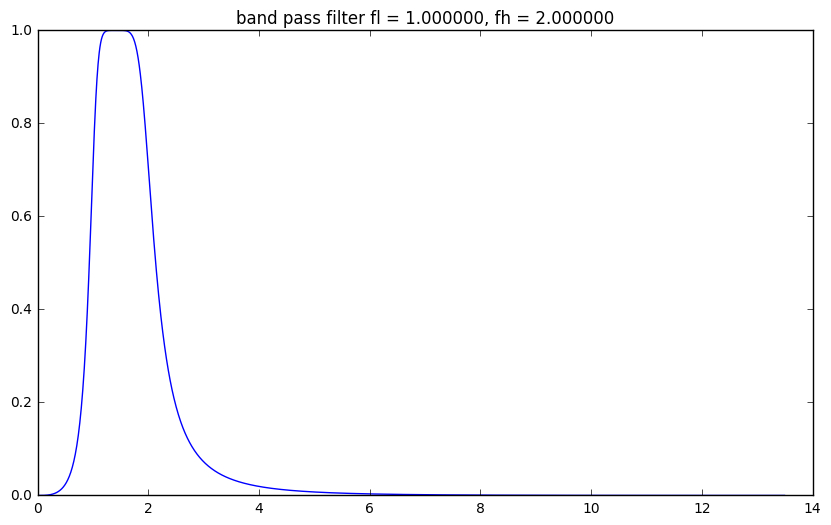

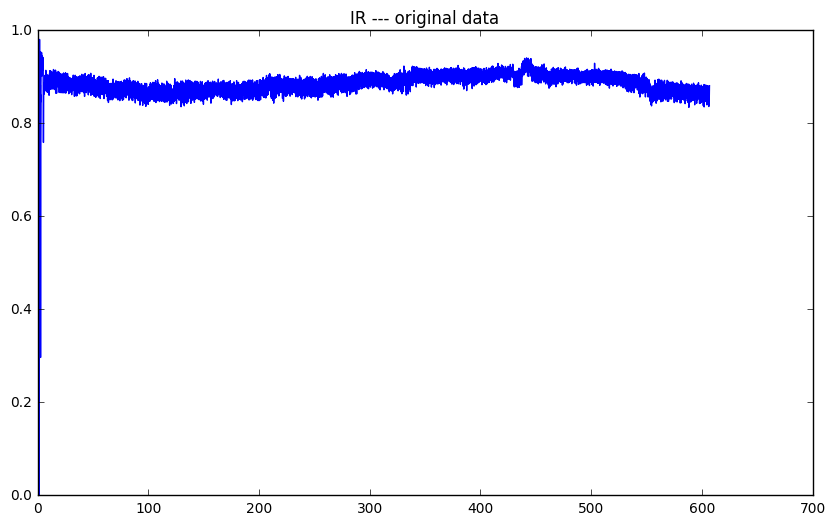

In [12]:
fs = 27
lowcut = 1
highcut = 2
order = 3
data = IR
time = timestamp
thres=0.2
min_dist= 15
# lowcut = 1/6.0
# highcut = 1/3.0

# Plot the frequency response for a few different orders.
plt.figure(figsize=(10,6))
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.figure(figsize=(10,6))
plt.plot(time, data)
plt.title("IR --- original data")
pyplot.figure(figsize=(10,6))
heartIndex = peakutils.indexes(y, thres, min_dist)


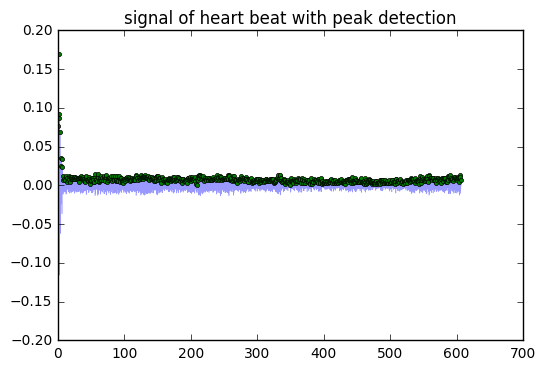

In [13]:
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[heartIndex],y[heartIndex], marker="o", ls="", ms=3 )
plt.title("signal of heart beat with peak detection")

In [14]:
heartRate = caculateRate(time, y, thres,min_dist,fs)
print "the average heart rate is %f"% (np.sum(heartRate)/len(heartRate))

number of peak 743
the average heart rate is 74.721931


[ 93.75        93.75        93.75       ...,  68.18181818  68.18181818
  68.18181818]


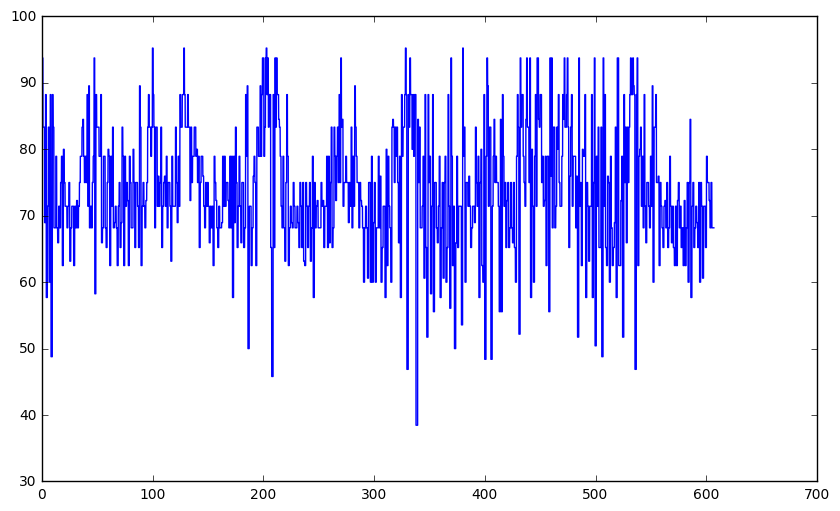

In [15]:
heartBeatArray = np.zeros(len(IR))
count = 1
for i in range(len(heartBeatArray)):
    if i < heartIndex[count] or  count == len(heartRate) - 1 :
        heartBeatArray[i] = heartRate[count - 1]
    else:
        if(count < len(heartRate) - 1):
            count = count + 1
            heartBeatArray[i] = heartRate[count - 1]
print heartBeatArray
plt.figure(figsize=(10,6))
plt.plot(time, heartBeatArray)

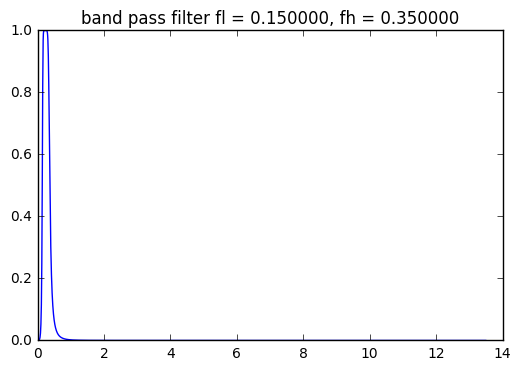

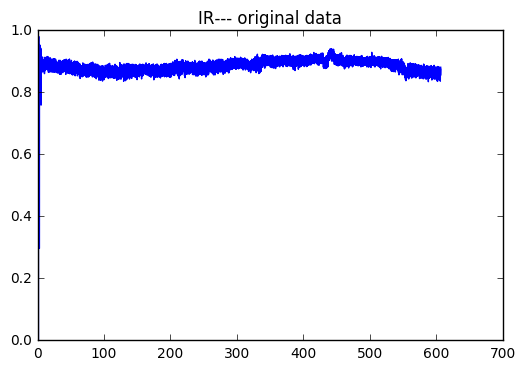

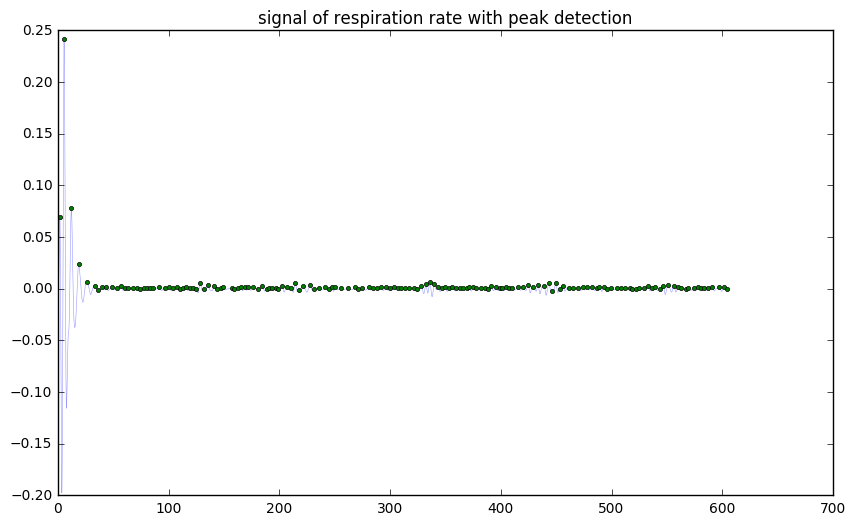

In [22]:
fs = 27.0
lowcut = 0.15
highcut = 0.35
order = 4
data = IR
time = timestamp
thres= 0.01
min_dist = 15
# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.plot(time, data)
plt.title("IR--- original data")
pyplot.figure(figsize=(10,6))
respirationIndex = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[respirationIndex],y[respirationIndex], marker="o", ls="", ms=3 )
plt.title("signal of respiration rate with peak detection")

In [23]:
respirationRate = caculateRate(time, y, thres,min_dist,fs)
# filter abnormal result
result = [x for x in respirationRate if x <= 20 ]
print "the average respiration  rate is %f"% (np.sum(result)/len(result))

number of peak 160
the average respiration  rate is 15.165340


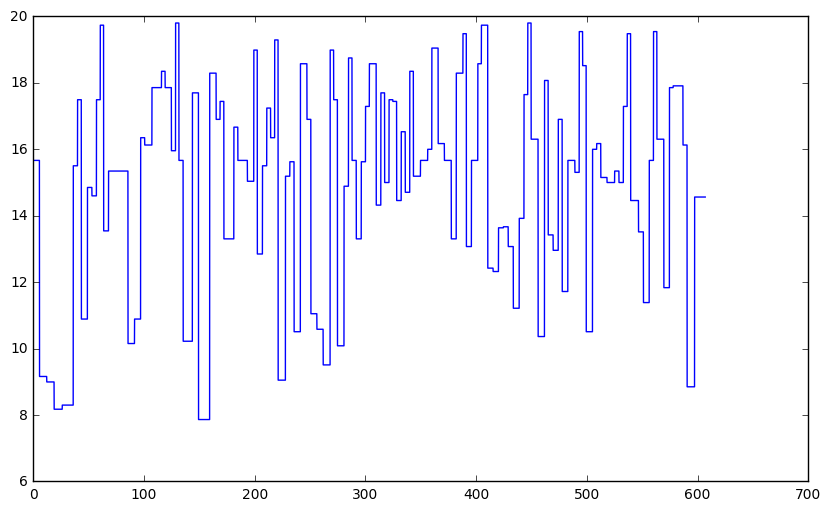

In [13]:
for i in range(len(respirationRate)):
    if respirationRate[i] > 20:
        respirationRate[i] = respirationRate[i - 1]
respirationArray = np.zeros(len(IR))
count = 1
for i in range(len(respirationArray)):
    if i < respirationIndex[count] or  count == len(respirationRate) - 1 :
        respirationArray[i] = respirationRate[count - 1]
    else:
        if(count < len(respirationRate) - 1):
            count = count + 1
            respirationArray[i] = respirationRate[count - 1]
plt.figure(figsize=(10,6))
plt.plot(time, respirationArray)

# Calculate SPO2 

## IR signal

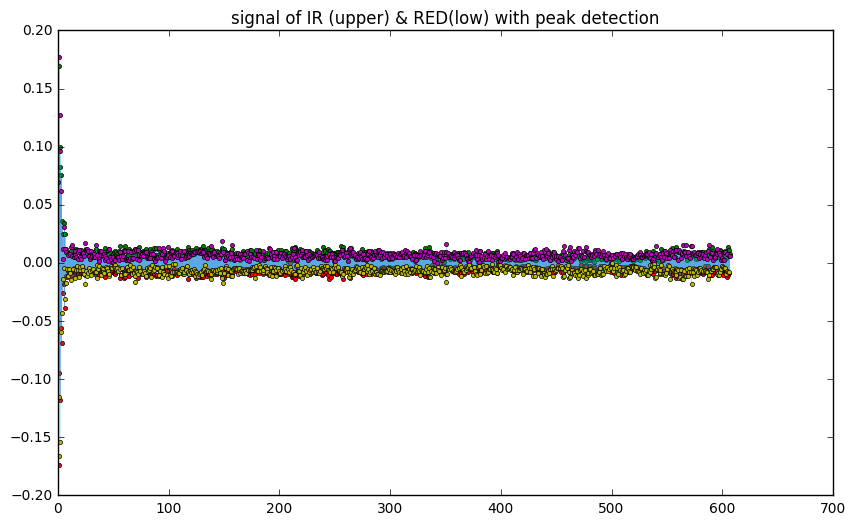

In [24]:
#IROrgin = ordata['IR']
#REDOrgin = ordata['RED']
IROrgin = IR
REDOrgin = RED

fs = 26
lowcut = 1
highcut = 2
order = 3

IROrgin = butter_bandpass_filter(IROrgin, lowcut, highcut, fs, order)
REDOrgin = butter_bandpass_filter(REDOrgin, lowcut, highcut, fs, order)
time = timestamp
thres=0.05
min_dist=15
pyplot.figure(figsize=(10,6))
# the index of "postive" peak for IR signal
indexPositiveIR = peakutils.indexes(IROrgin, thres, min_dist)
# the index of "negative" peak for IR signal
indexNegativeIR = peakutils.indexes(-1*IROrgin, thres, min_dist)
# the index of "postive" peak for RED signal
indexPositiveRED = peakutils.indexes(REDOrgin, thres, min_dist)
# the index of "negative" peak for RED signal
indexNegativeRED = peakutils.indexes(-1*REDOrgin, thres, min_dist)
# we find the 15th negative peak will be wrong tagged for "RED" signal
# so we manually remove this point from our indexNegativeRED tuple using following code
indexNegativeRED = list(indexNegativeRED)
del indexNegativeRED[14]
plt.plot(time, IROrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveIR],IROrgin[indexPositiveIR], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeIR],IROrgin[indexNegativeIR], marker="o", ls="", ms=3 )
plt.plot(time, REDOrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveRED],REDOrgin[indexPositiveRED], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeRED],REDOrgin[indexNegativeRED], marker="o", ls="", ms=3 )
plt.title("signal of IR (upper) & RED(low) with peak detection")

In [28]:
def calculateDC(data):
    DC = np.zeros(len(data) - 1) 
    for i in range(len(DC)):
        DC[i] = (data[i + 1] + data[i])/2.0
    return DC

def calculateAC(positive, negative):
#     if len (positive) != len(negative):
#          raise ValueError("the input data should has same dimension")
    minLen = min(len(positive), len(negative))
    AC = np.zeros(minLen - 1)
    for i in range(len(AC)):
        AC[i] = positive[i + 1] - negative[i]
    return AC


ACIR = abs(calculateAC(IROrgin[indexPositiveIR], IROrgin[indexNegativeIR]))
ACRED = abs(calculateAC(REDOrgin[indexPositiveRED], REDOrgin[indexNegativeRED]))

minLen = min(len(ACIR), len(ACRED))
ACIR = ACIR[0:minLen]
ACRED = ACRED[0:minLen]
# DCIR = IROrgin[indexNegativeIR]
# DCRED = REDOrgin[indexNegativeRED]
DCIR = abs(calculateDC(indexNegativeIR))
DCRED = abs(calculateDC(indexNegativeRED))

DCIR = DCIR[0:minLen]
DCRED = DCRED[0:minLen]


ratioAverage = (ACRED * DCIR) * 1.0/(ACIR * DCRED)
spo2 = -45.060*ratioAverage* ratioAverage + 30.354 *ratioAverage + 94.845 


for i in range(len(spo2)):
    if spo2[i] < 90:
        spo2[i] = spo2[i-1] 

count = len(spo2) - 1
while(count >= 0):
    if spo2[count] < 90:
        spo2[count] = spo2[count+1]
    count = count - 1
    
print sum(spo2)/len(spo2)

95.8126124003


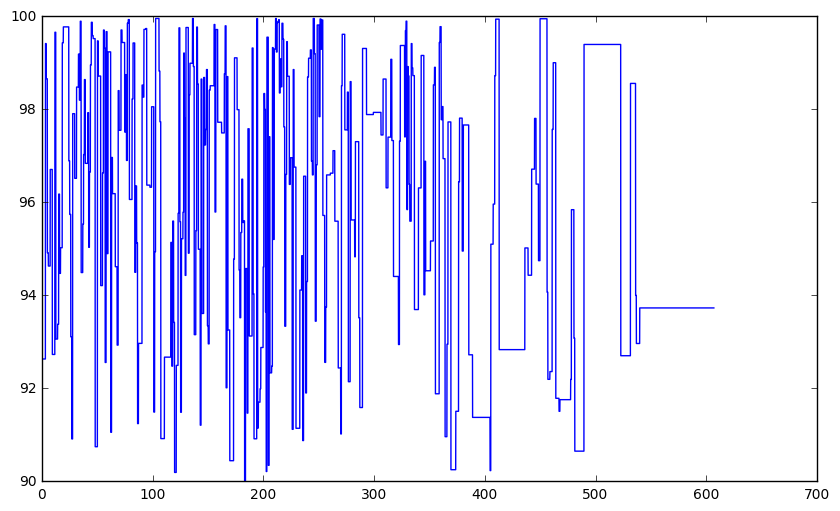

In [29]:
spo2Array = np.zeros(len(IR))
count = 1
for i in range(len(spo2Array)):
    if i < indexPositiveIR[count] or  count == len(spo2) - 1 :
        spo2Array[i] = spo2[count - 1]
    else:
        if(count < len(spo2) - 1):
            count = count + 1
            spo2Array[i] = spo2[count - 1]
plt.figure(figsize=(10,6))
plt.plot(time, spo2Array)


In [30]:
saveData = np.zeros((len(IR), 9))
ir = ordata['IR']
red = ordata['RED']
x = ordata["X"]
y = ordata["Y"]
z = ordata["Z"]

for i in range(len(IR)):
    saveData[i, 0] = timestamp[i]
    saveData[i, 1] = ir[i]
    saveData[i, 2] = red[i]
    saveData[i, 3] = x[i]
    saveData[i, 4] = y[i]    
    saveData[i, 5] = z[i]
    saveData[i, 6] = heartBeatArray[i]
    saveData[i, 7] = respirationArray[i]
    saveData[i, 8] = spo2Array[i]

NameError: name 'respirationArray' is not defined

In [20]:
np.savetxt("team9_assignment8_sleeping.csv", saveData, fmt='%.3f', header="Time,IR, RED, X, Y, Z, Heart Rate, Resoiration Rate, SPO2", delimiter=',')

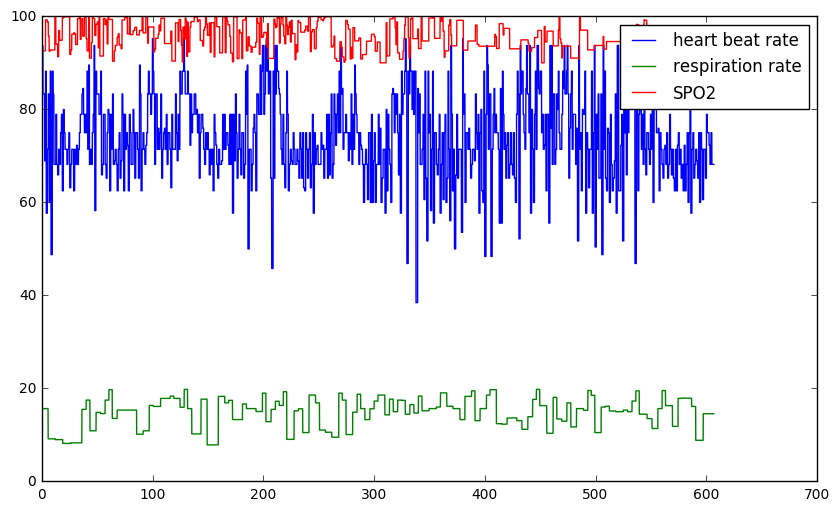

In [21]:
plt.figure(figsize=(10,6))
plt.plot(time, heartBeatArray, label='heart beat rate')
plt.plot(time, respirationArray, label = "respiration rate")
plt.plot(time, spo2Array, label = "SPO2")
plt.legend()

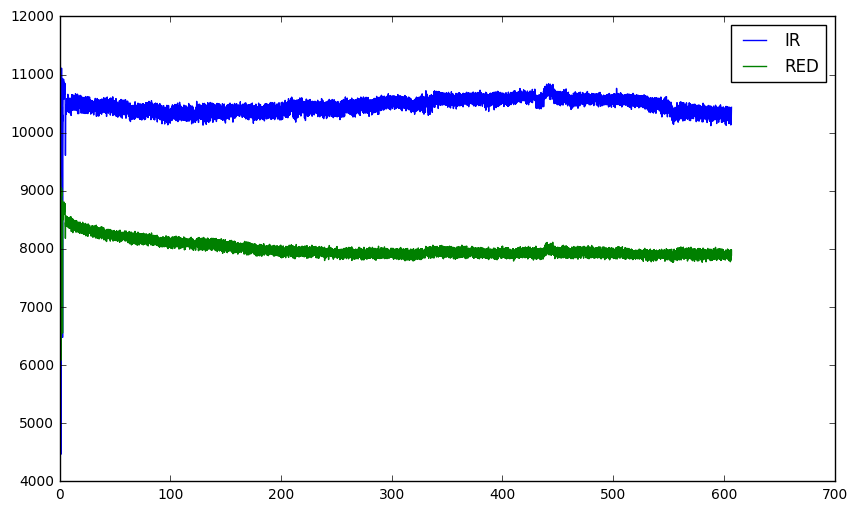

In [22]:
plt.figure(figsize=(10,6))
plt.plot(time, ir, label = "IR")
plt.plot(time, red, label = "RED")
plt.legend()

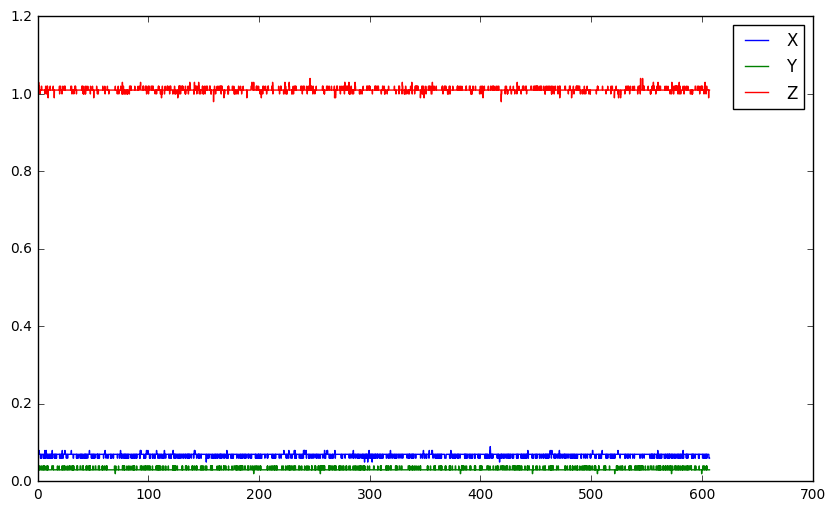

In [23]:
plt.figure(figsize=(10,6))
plt.plot(time, x, label = "X")
plt.plot(time, y, label = "Y")
plt.plot(time, z, label = "Z")

plt.legend()

In [24]:
np.sum(spo2Array)/len(spo2Array)

97.045833901386814